In [70]:
## import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
import plotly.express as px
import plotly.io as pio
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pickle

In [73]:
%matplotlib inline

In [2]:
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
## format options
pd.options.display.float_format = '{:,.2f}'.format
font_size = 15

In [4]:
## loading monthly and yearly datasets
df_m = pd.read_csv('housing_in_london_monthly_variables.csv')
df_y = pd.read_csv('housing_in_london_yearly_variables.csv')

In [5]:
## monthly dataset
df_m

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.00,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.00,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.00,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.00,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,"64,605.00",NaN,0
13545,2019-10-01,england,249376,E92000001,"68,677.00",NaN,0
13546,2019-11-01,england,248515,E92000001,"67,814.00",NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [6]:
## yearly dataset
df_y

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,"33,020.00",NaN,48922,0,"6,581.00",NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,"21,480.00",NaN,23620,3,"162,444.00",NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,"19,568.00",NaN,23128,8,"313,469.00",NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,"18,621.00",NaN,21386,18,"217,458.00",NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,"18,532.00",NaN,20911,6,"260,317.00",NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,K03000001,great britain,2019-12-01,"30,446.00",NaN,37603,NaN,NaN,NaN,NaN,NaN,0
1067,K04000001,england and wales,2019-12-01,"30,500.00",NaN,37865,NaN,NaN,NaN,NaN,NaN,0
1068,N92000002,northern ireland,2019-12-01,"27,434.00",NaN,32083,NaN,NaN,NaN,NaN,NaN,0
1069,S92000003,scotland,2019-12-01,"30,000.00",NaN,34916,NaN,NaN,NaN,NaN,NaN,0


In [7]:
## preprocessing both datasets
## extracting year from the date variable
## filtering datasets on common year; 1999 - 2019

df_m['year'] = pd.DatetimeIndex(df_m['date']).year
df_y['year'] = pd.DatetimeIndex(df_y['date']).year

df_m = df_m[(df_m['year'] >= 1999) & (df_m['year']<= 2019)]
df_y = df_y[(df_y['year'] >= 1999) & (df_y['year']<= 2019)]



In [8]:
df_m.drop('date', axis=1, inplace=True)

/var/folders/_x/g3c6ff9x60b48nssm8x5w2qw0000gn/T/ipykernel_75408/1106648572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m.drop('date', axis=1, inplace=True)


In [9]:
## extracting necessary variable from yearly dataset in preparation to merging
dmg = df_y[['mean_salary', 'median_salary', 'area_size', 'population_size', 'area', 'year']]
dmg

,mean_salary,median_salary,area_size,population_size,area,year
0,48922,"33,020.00",NaN,"6,581.00",city of london,1999
1,23620,"21,480.00",NaN,"162,444.00",barking and dagenham,1999
2,23128,"19,568.00",NaN,"313,469.00",barnet,1999
3,21386,"18,621.00",NaN,"217,458.00",bexley,1999
4,20911,"18,532.00",NaN,"260,317.00",brent,1999
...,...,...,...,...,...,...
1066,37603,"30,446.00",NaN,NaN,great britain,2019
1067,37865,"30,500.00",NaN,NaN,england and wales,2019
1068,32083,"27,434.00",NaN,NaN,northern ireland,2019
1069,34916,"30,000.00",NaN,NaN,scotland,2019


In [10]:
## forming my dataset for exploration
df_m = pd.merge(df_m, dmg, left_on=['area', 'year'], right_on=['area', 'year'])

In [11]:
## saving and loading my complete dataset df 
df_m.to_csv('completelondon.csv', index=True)
df = pd.read_csv('completelondon.csv', index_col=0)
df

,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,mean_salary,median_salary,area_size,population_size
0,city of london,149143,E09000001,41.00,NaN,1,1999,48922,"33,020.00",NaN,"6,581.00"
1,city of london,164545,E09000001,31.00,NaN,1,1999,48922,"33,020.00",NaN,"6,581.00"
2,city of london,174586,E09000001,53.00,NaN,1,1999,48922,"33,020.00",NaN,"6,581.00"
3,city of london,191157,E09000001,28.00,NaN,1,1999,48922,"33,020.00",NaN,"6,581.00"
4,city of london,191081,E09000001,35.00,NaN,1,1999,48922,"33,020.00",NaN,"6,581.00"
...,...,...,...,...,...,...,...,...,...,...,...
10831,england,249432,E92000001,"75,079.00",NaN,0,2019,38206,"30,667.00",NaN,NaN
10832,england,249942,E92000001,"64,605.00",NaN,0,2019,38206,"30,667.00",NaN,NaN
10833,england,249376,E92000001,"68,677.00",NaN,0,2019,38206,"30,667.00",NaN,NaN
10834,england,248515,E92000001,"67,814.00",NaN,0,2019,38206,"30,667.00",NaN,NaN


In [12]:
## getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10836 entries, 0 to 10835
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             10836 non-null  object 
 1   average_price    10836 non-null  int64  
 2   code             10836 non-null  object 
 3   houses_sold      10793 non-null  float64
 4   no_of_crimes     7407 non-null   float64
 5   borough_flag     10836 non-null  int64  
 6   year             10836 non-null  int64  
 7   mean_salary      10836 non-null  object 
 8   median_salary    10572 non-null  float64
 9   area_size        7992 non-null   float64
 10  population_size  10320 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1015.9+ KB


In [9]:
## encoding area from string to integer for better analysis
df["area"] = df["area"].astype('category')
df["areaEnc"] = (df["area"].cat.codes)

<class 'pandas.core.frame.DataFrame'>
Index: 10836 entries, 0 to 10835
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             10836 non-null  object 
 1   average_price    10836 non-null  int64  
 2   code             10836 non-null  object 
 3   houses_sold      10793 non-null  float64
 4   no_of_crimes     7407 non-null   float64
 5   borough_flag     10836 non-null  int64  
 6   year             10836 non-null  int64  
 7   mean_salary      10836 non-null  object 
 8   median_salary    10572 non-null  float64
 9   area_size        7992 non-null   float64
 10  population_size  10320 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1015.9+ KB


<Axes: >

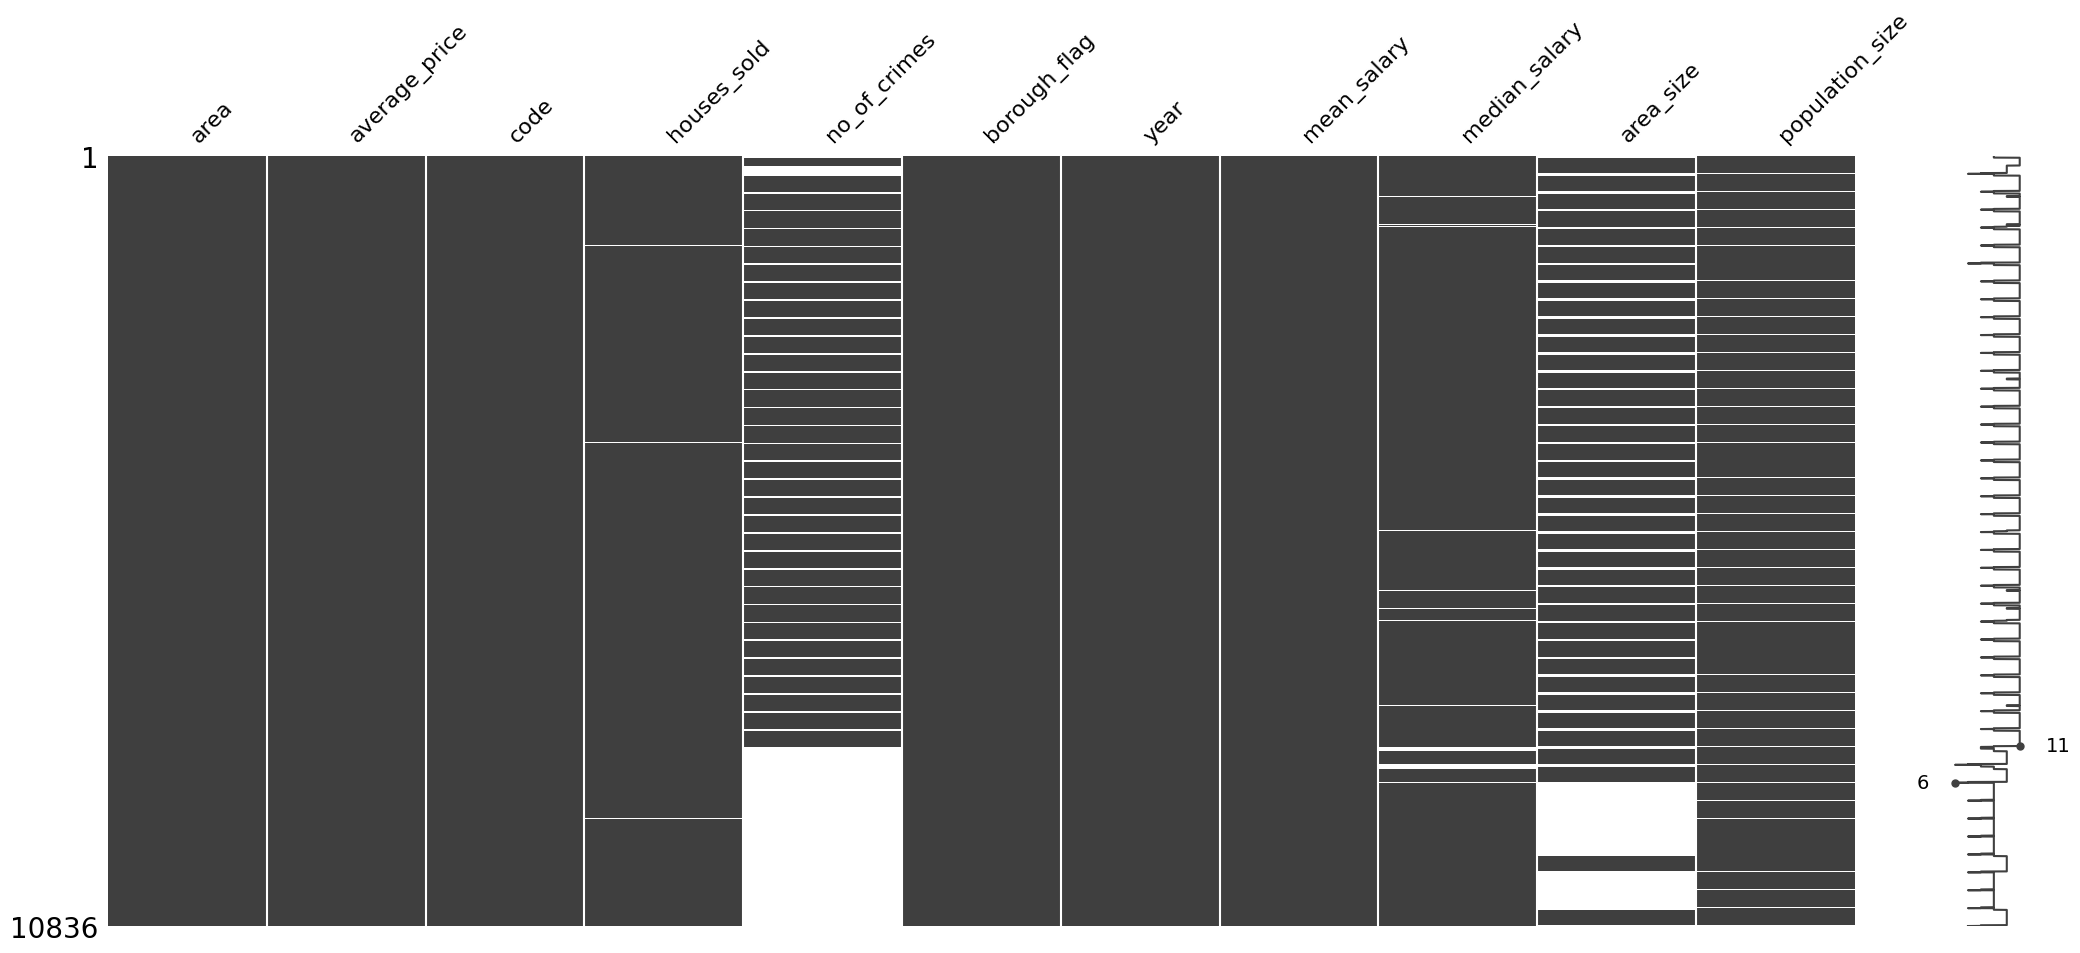

In [13]:
## getting info about the dataset and visualizing missing values
df.info()
msno.matrix(df)

In [ ]:
nulldf = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)*100

nulldf = pd.concat([nulldf, percent], axis = 1, keys = ['Counts', '% Missing'])
print ('Missing: ')
nulldf.head()

In [14]:
## filling up missing values
df['mean_salary'] = df['mean_salary'].replace('-', np.NaN)
df['mean_salary'] = df['mean_salary'].replace('#', np.NaN)
df['mean_salary'] = df['mean_salary'].astype(float)


df['houses_sold']=df['houses_sold'].fillna(df['houses_sold'].mean())
df['no_of_crimes']=df['no_of_crimes'].fillna(df['no_of_crimes'].mean())
df['median_salary']=df['median_salary'].fillna(df['median_salary'].mean())
df['area_size']=df['area_size'].fillna(df['area_size'].mean())
df['mean_salary']=df['mean_salary'].fillna(df['mean_salary'].median())
df['population_size']=df['population_size'].fillna(df['population_size'].median())

area               0
average_price      0
code               0
houses_sold        0
no_of_crimes       0
borough_flag       0
year               0
mean_salary        0
median_salary      0
area_size          0
population_size    0
dtype: int64


<Axes: >

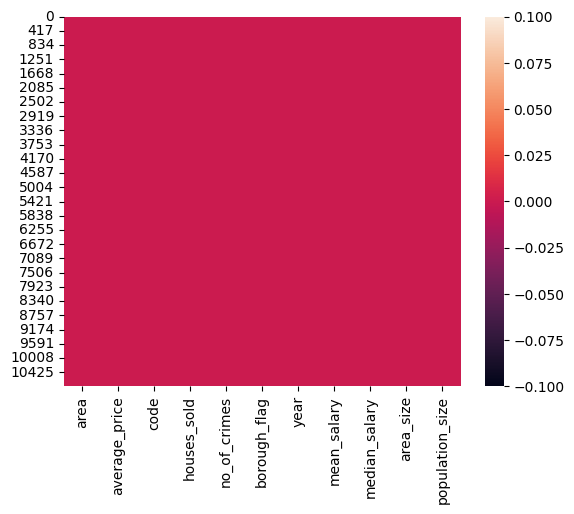

In [15]:
## further visualising missing values
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [17]:
# value counts for categorical values
print(df['area'].value_counts())
print(df['borough_flag'].value_counts())
print(df['year'].min(), df['year'].max())

area
city of london            252
westminster               252
newham                    252
redbridge                 252
richmond upon thames      252
southwark                 252
sutton                    252
tower hamlets             252
waltham forest            252
wandsworth                252
inner london              252
lewisham                  252
outer london              252
north east                252
north west                252
east midlands             252
west midlands             252
london                    252
south east                252
south west                252
merton                    252
lambeth                   252
barking and dagenham      252
greenwich                 252
barnet                    252
bexley                    252
brent                     252
bromley                   252
camden                    252
croydon                   252
ealing                    252
enfield                   252
hackney                   252
kings

In [18]:
## total number of houses sold
df['houses_sold'].value_counts().sum()

10836

In [19]:
## change Code variable dtype to float
df['code']=df.code.str.replace('E','').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10836 entries, 0 to 10835
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             10836 non-null  object 
 1   average_price    10836 non-null  int64  
 2   code             10836 non-null  int64  
 3   houses_sold      10836 non-null  float64
 4   no_of_crimes     10836 non-null  float64
 5   borough_flag     10836 non-null  int64  
 6   year             10836 non-null  int64  
 7   mean_salary      10836 non-null  float64
 8   median_salary    10836 non-null  float64
 9   area_size        10836 non-null  float64
 10  population_size  10836 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1015.9+ KB


In [20]:
## dataset statistics
df.describe()

,average_price,code,houses_sold,no_of_crimes,borough_flag,year,mean_salary,median_salary,area_size,population_size
count,"10,836.00","10,836.00","10,836.00","10,836.00","10,836.00","10,836.00","10,836.00","10,836.00","10,836.00","10,836.00"
mean,"303,022.25","11,604,665.14","3,681.82","2,157.46",0.77,"2,009.00","35,588.23","28,789.28","372,490.27","2,434,149.44"
std,"186,792.37","12,475,924.72","12,378.51",745.64,0.42,6.06,"11,351.63","6,425.20","1,851,182.61","7,825,512.25"
min,"43,969.00","9,000,001.00",2.00,0.00,0.00,"1,999.00","18,351.00","15,684.00",315.00,"6,581.00"
25%,"182,132.50","9,000,011.00",234.00,"1,890.00",1.00,"2,004.00","29,207.00","24,652.00","3,532.00","218,559.00"
50%,"253,983.00","9,000,022.00",354.00,"2,157.46",1.00,"2,009.00","33,047.00","28,445.00","5,876.00","268,889.50"
75%,"377,379.50","9,000,033.00",678.25,"2,362.00",1.00,"2,014.00","38,406.00","31,533.00","372,490.27","343,059.00"
max,"1,463,378.00","92,000,001.00","132,163.00","7,461.00",1.00,"2,019.00","90,842.00","61,636.00","13,303,728.00","55,977,178.00"


In [21]:
## what year had the maximun average price
df.groupby('year').average_price.max()

year
1999     354241
2000     397353
2001     451028
2002     497538
2003     488704
2004     559286
2005     555847
2006     644541
2007     830950
2008     832753
2009     782459
2010     884674
2011     959520
2012    1077366
2013    1217729
2014    1365050
2015    1353679
2016    1357231
2017    1412255
2018    1463378
2019    1294113
Name: average_price, dtype: int64

In [22]:
## what year had the maximun hoses sold
df_maxSold = round(df.groupby('year')['houses_sold'].mean(),2).sort_values().to_frame().reset_index()
df_maxSold

,year,houses_sold
0,2009,"2,324.03"
1,2008,"2,412.20"
2,2011,"2,511.11"
3,2010,"2,525.11"
4,2012,"2,559.22"
5,2019,"3,045.58"
6,2013,"3,063.62"
7,2018,"3,214.96"
8,2017,"3,397.54"
9,2016,"3,479.77"


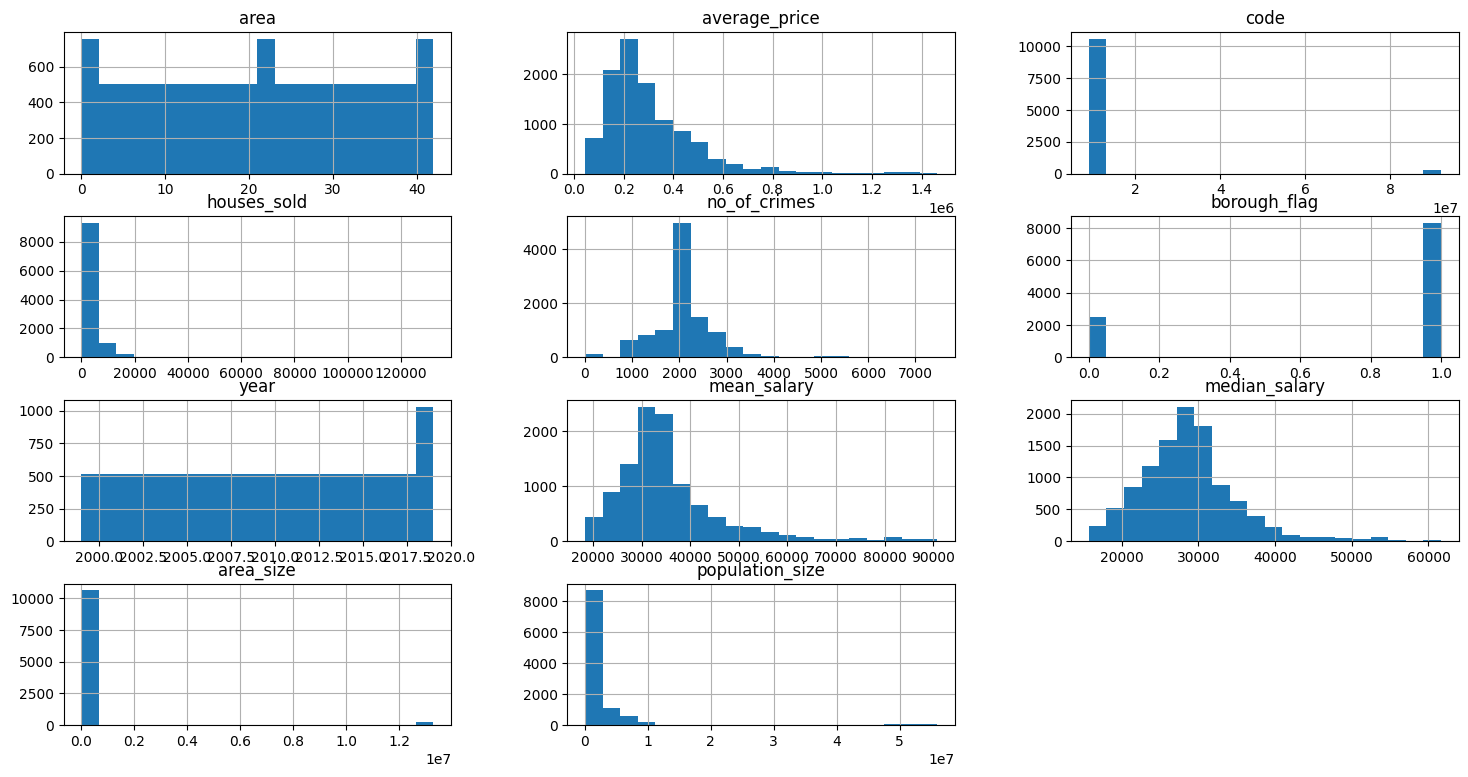

In [115]:
## calling the histogram method on the whole dataset
df.hist(bins=20, figsize=(18,9))
plt.show()

<Axes: xlabel='year', ylabel='average_price'>

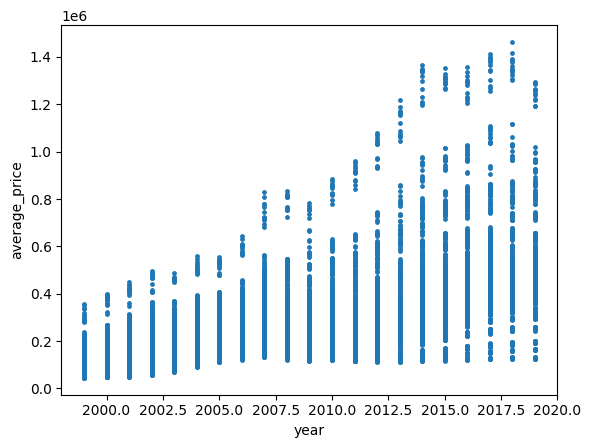

In [24]:
## visualising continuous variables of year and average price
df.plot(kind='scatter', x='year', y='average_price', s=6)

<Axes: xlabel='year', ylabel='houses_sold'>

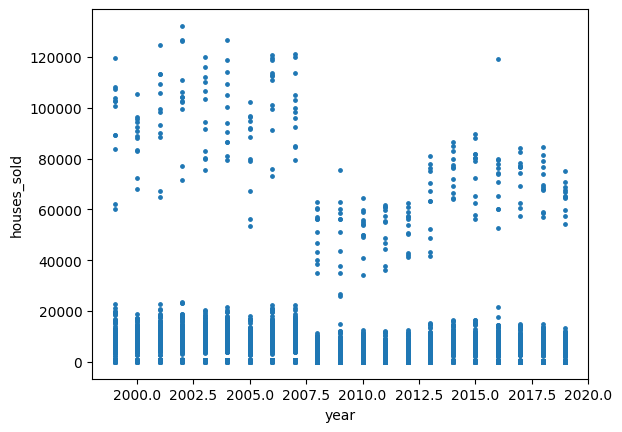

In [25]:
## visualising continuous variables of year and houses sold
df.plot(kind='scatter', x='year', y='houses_sold', s=6)

In [26]:
## average mean for each area on the dataset
df_area_mean = round(df.groupby('area')['average_price'].mean(),2).sort_values().to_frame().reset_index()
df_area_mean

,area,average_price
0,north east,"107,126.58"
1,north west,"120,651.13"
2,east midlands,"135,322.13"
3,west midlands,"141,020.06"
4,england,"170,853.70"
5,barking and dagenham,"179,274.29"
6,south west,"182,792.83"
7,bexley,"211,724.87"
8,south east,"219,556.65"
9,newham,"220,845.56"


In [27]:
# creating dataset cuts based on location area
london = df[df['borough_flag'] == 1]
restofEngland = df[df['borough_flag'] == 0]

In [28]:
# Calculate mean prices for the different cuts of data
london_mprice = london.groupby('area')['average_price'].mean()
restofEngland_mprice = restofEngland.groupby('area')['average_price'].mean()

In [51]:
lnd_pricem = pd.DataFrame(london_mprice)

lnd_pricem

,average_price
area,
barking and dagenham,"179,274.29"
barnet,"342,465.12"
bexley,"211,724.87"
brent,"305,240.68"
bromley,"284,322.54"
camden,"527,806.98"
city of london,"480,923.93"
croydon,"234,095.76"
ealing,"308,243.57"


In [83]:
df

,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,mean_salary,median_salary,area_size,population_size
0,city of london,149143,9000001,41.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
1,city of london,164545,9000001,31.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
2,city of london,174586,9000001,53.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
3,city of london,191157,9000001,28.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
4,city of london,191081,9000001,35.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
...,...,...,...,...,...,...,...,...,...,...,...
10831,england,249432,92000001,"75,079.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"
10832,england,249942,92000001,"64,605.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"
10833,england,249376,92000001,"68,677.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"
10834,england,248515,92000001,"67,814.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"


In [63]:
## Total houses sold according to Location
total_houses_sold = round(df.groupby('borough_flag')['houses_sold'].sum()/1000000,1)
total_houses_sold.to_frame(name = 'Total houses sold (Million)')

,Total houses sold (Million)
borough_flag,
0,37.20
1,2.70


In [29]:
## calculating area under Greater London
london_boroughs = df[df['borough_flag'] == 1]['area'].unique()
print(len(london_boroughs))
for i, name in enumerate(london_boroughs):
  print(i+1,'-', name)

33
1 - city of london
2 - barking and dagenham
3 - barnet
4 - bexley
5 - brent
6 - bromley
7 - camden
8 - croydon
9 - ealing
10 - enfield
11 - greenwich
12 - hackney
13 - hammersmith and fulham
14 - haringey
15 - harrow
16 - havering
17 - hillingdon
18 - hounslow
19 - islington
20 - kensington and chelsea
21 - kingston upon thames
22 - lambeth
23 - lewisham
24 - merton
25 - newham
26 - redbridge
27 - richmond upon thames
28 - southwark
29 - sutton
30 - tower hamlets
31 - waltham forest
32 - wandsworth
33 - westminster


In [58]:
df

,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,mean_salary,median_salary,area_size,population_size
0,city of london,149143,9000001,41.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
1,city of london,164545,9000001,31.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
2,city of london,174586,9000001,53.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
3,city of london,191157,9000001,28.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
4,city of london,191081,9000001,35.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
...,...,...,...,...,...,...,...,...,...,...,...
10831,england,249432,92000001,"75,079.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"
10832,england,249942,92000001,"64,605.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"
10833,england,249376,92000001,"68,677.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"
10834,england,248515,92000001,"67,814.00","2,157.46",0,2019,"38,206.00","30,667.00","372,490.27","268,889.50"


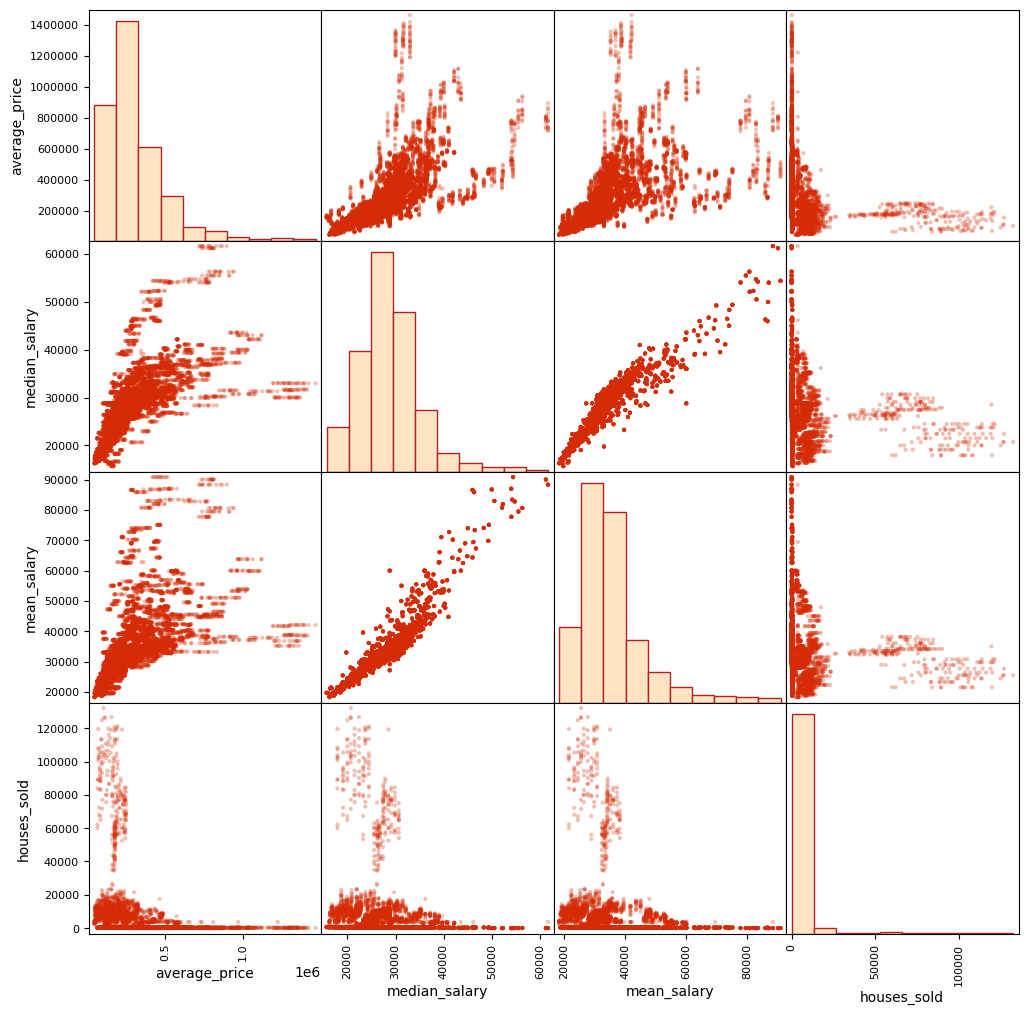

In [59]:
variables = ['average_price', 'median_salary', 'mean_salary', 'houses_sold']

scatter_matrix(df[variables], figsize = (12, 12), color = '#D52B06', alpha = 0.3, 
               hist_kwds = {'color':['bisque'], 'edgecolor': 'firebrick'})

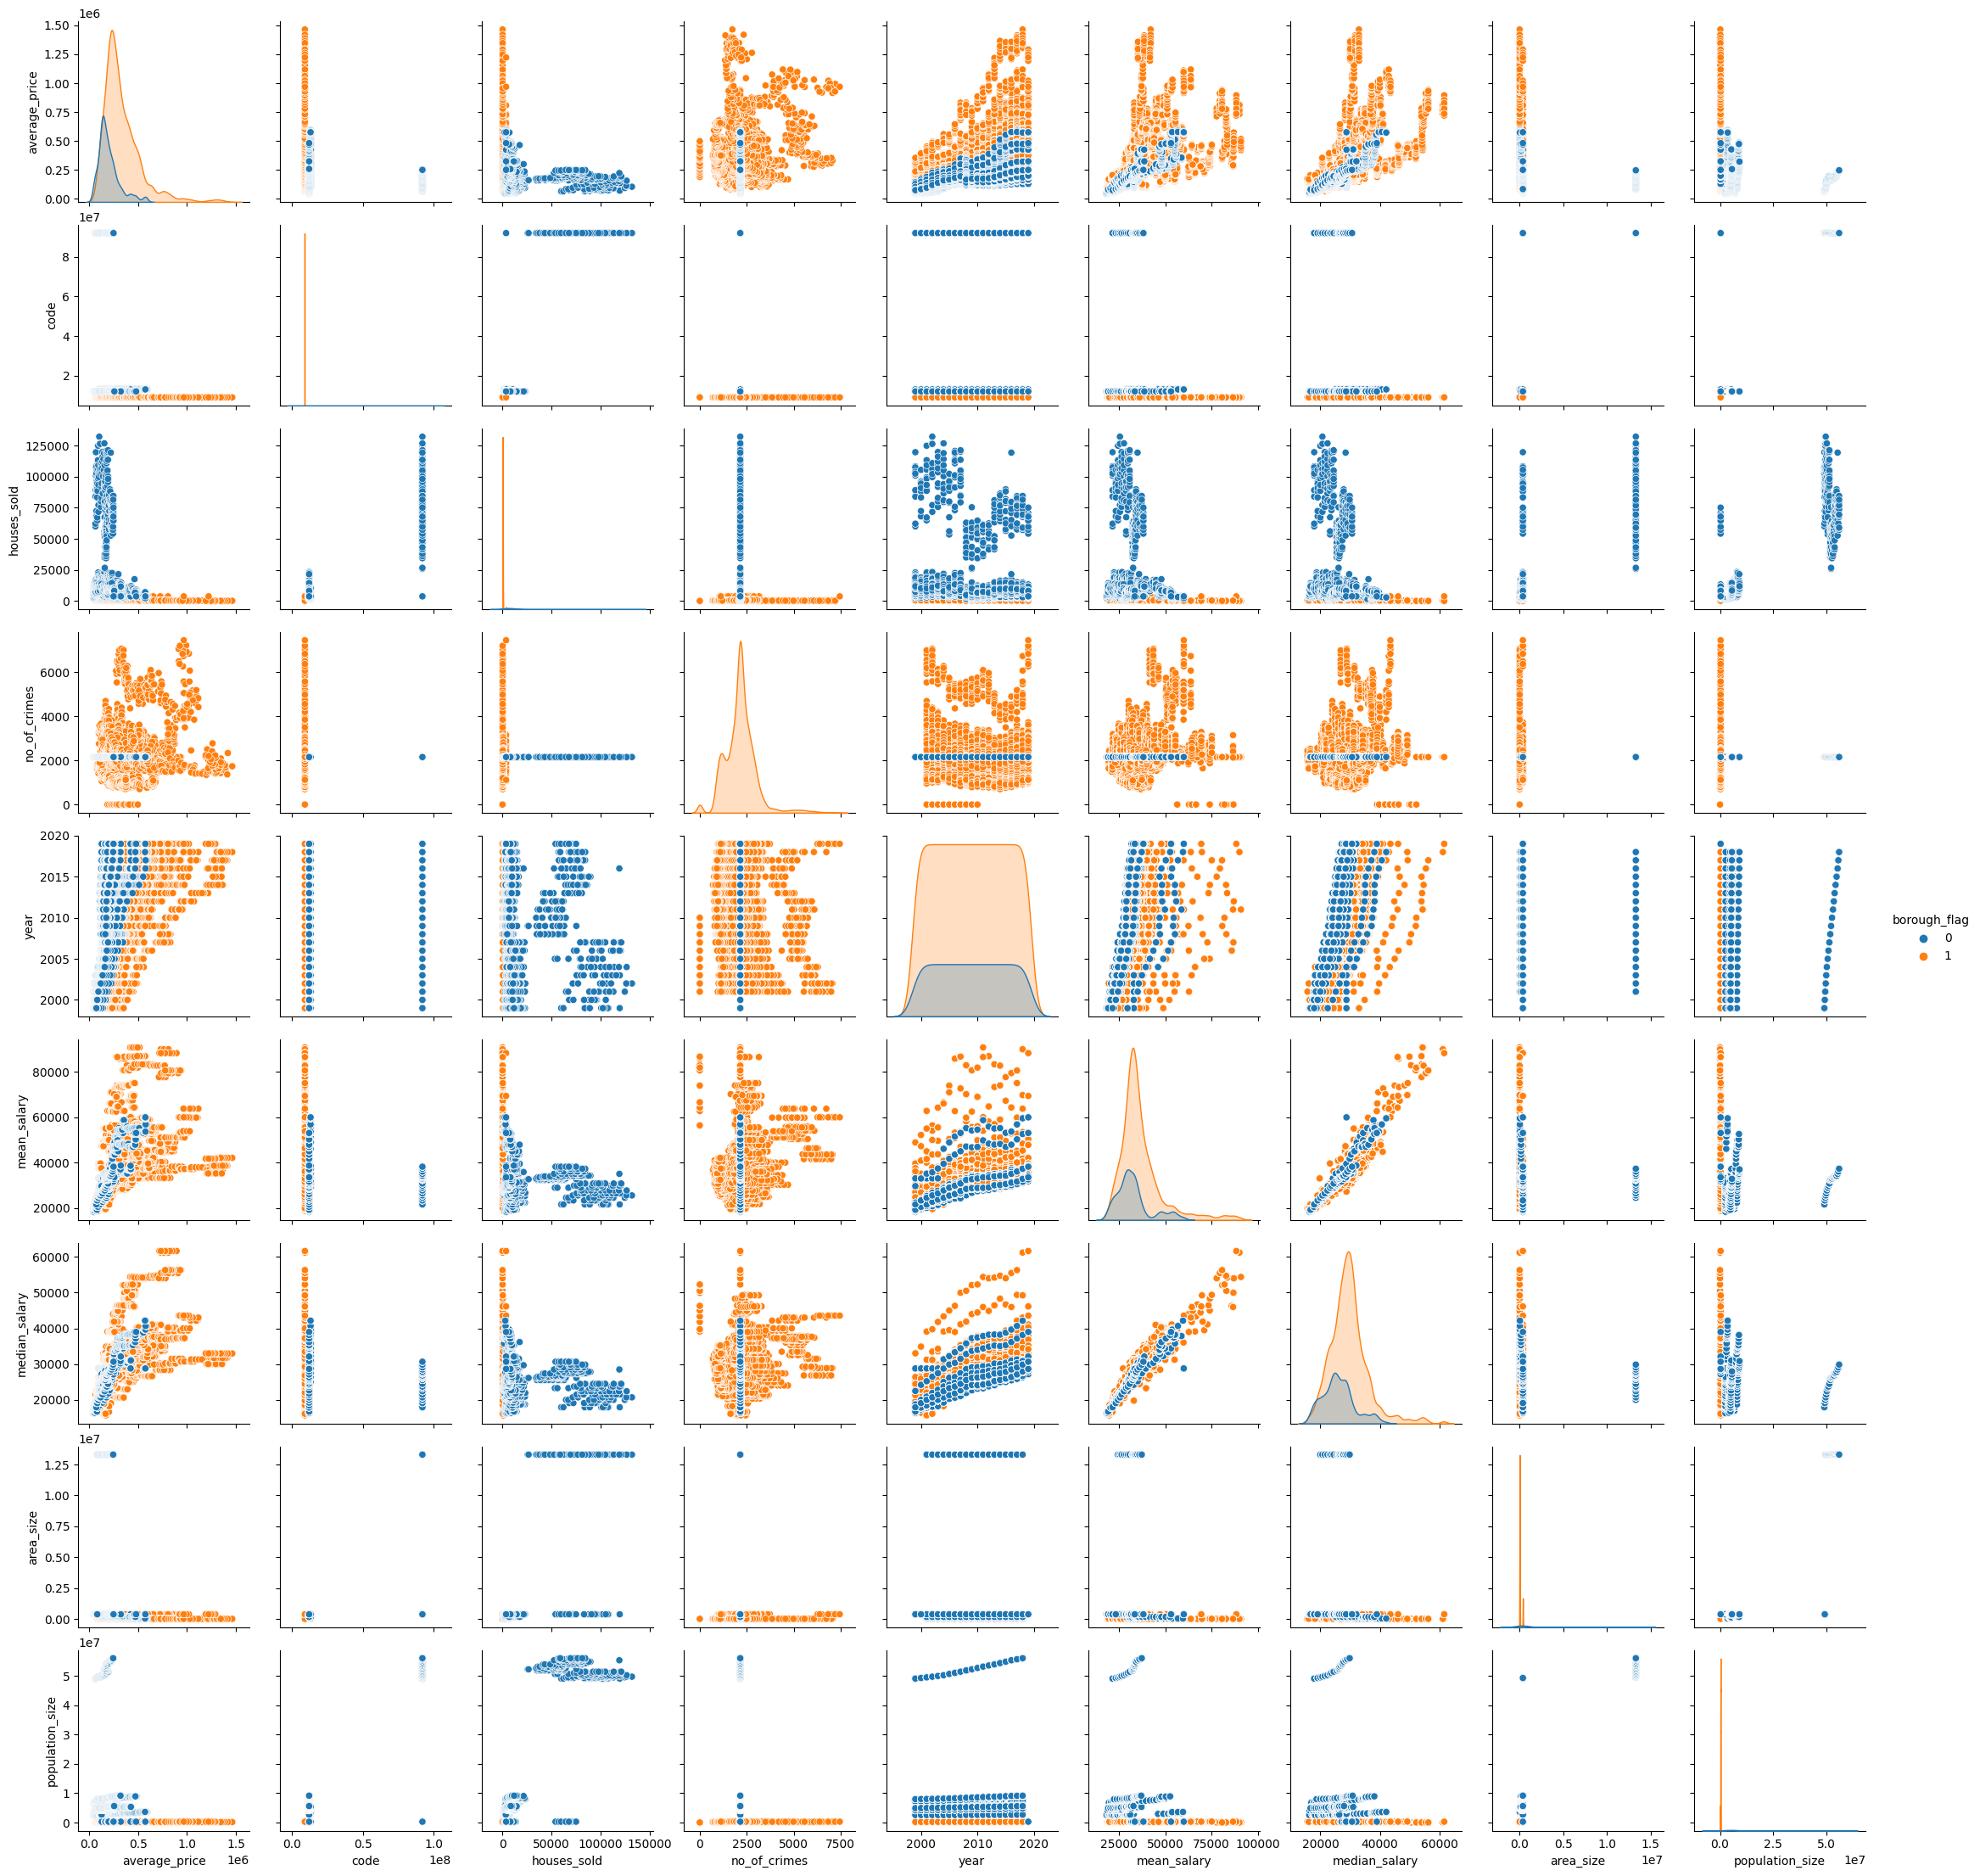

In [56]:
sns.pairplot(df, hue='borough_flag')

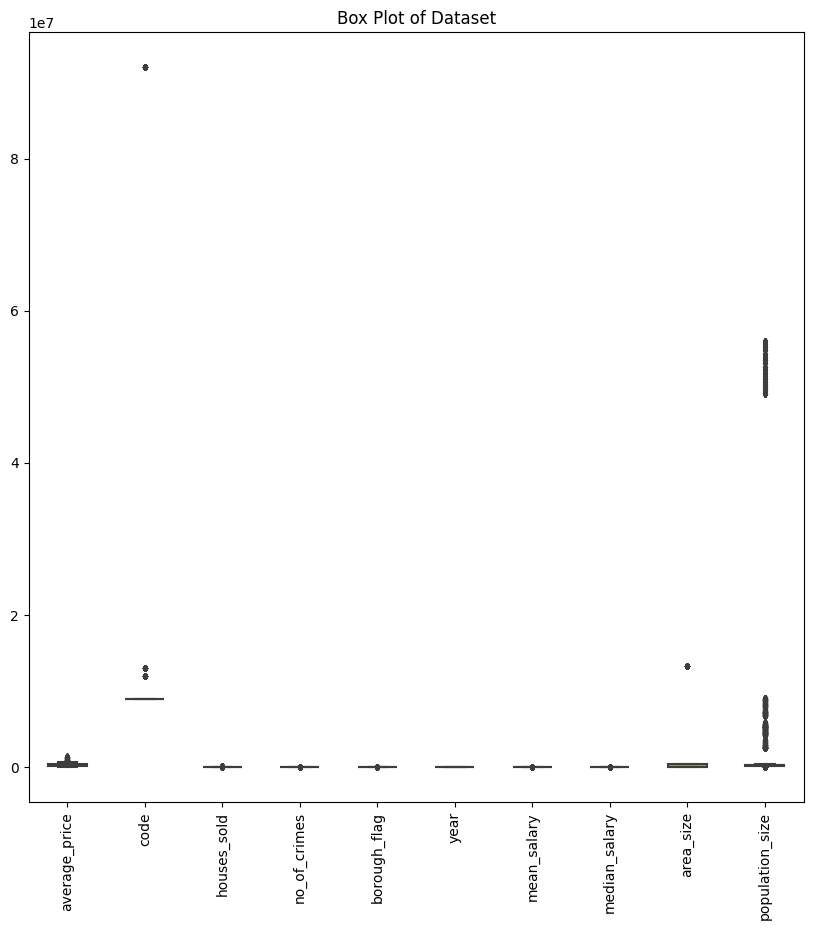

In [32]:
## calling Box plot for whole dataset
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)
plt.title('Box Plot of Dataset', loc="center")
plt.xticks(rotation=90)
plt.show()

In [33]:
## exploratory data analysis
## correlation matrix

corr_mat = df.corr(numeric_only=True)
corr_mat

,average_price,code,houses_sold,no_of_crimes,borough_flag,year,mean_salary,median_salary,area_size,population_size
average_price,1.00,-0.14,-0.18,0.09,0.30,0.59,0.54,0.64,-0.12,-0.18
code,-0.14,1.00,0.93,0.00,-0.38,0.00,-0.07,-0.11,0.92,0.95
houses_sold,-0.18,0.93,1.00,0.00,-0.49,-0.05,-0.12,-0.17,0.85,0.93
no_of_crimes,0.09,0.00,0.00,1.00,-0.00,-0.09,0.12,0.08,0.00,0.00
borough_flag,0.30,-0.38,-0.49,-0.00,1.00,-0.00,0.15,0.23,-0.31,-0.51
year,0.59,0.00,-0.05,-0.09,-0.00,1.00,0.38,0.57,0.00,-0.01
mean_salary,0.54,-0.07,-0.12,0.12,0.15,0.38,1.00,0.93,-0.07,-0.10
median_salary,0.64,-0.11,-0.17,0.08,0.23,0.57,0.93,1.00,-0.11,-0.14
area_size,-0.12,0.92,0.85,0.00,-0.31,0.00,-0.07,-0.11,1.00,0.92
population_size,-0.18,0.95,0.93,0.00,-0.51,-0.01,-0.10,-0.14,0.92,1.00


<Axes: >

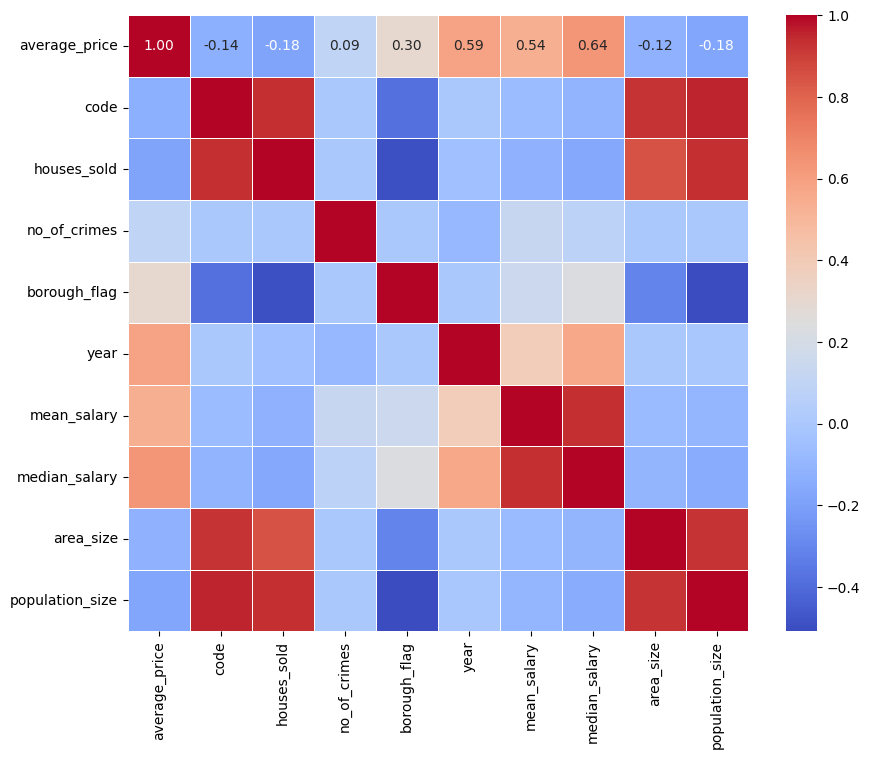

In [34]:
## heatmap of the dataset
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

Text(0.5, 0, 'average price')

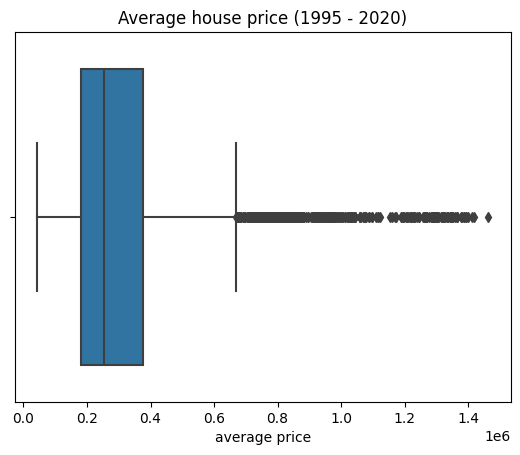

In [35]:
## boxplot for average price
sns.boxplot(df, x="average_price")
plt.title('Average house price (1995 - 2020)')
plt.xlabel('average price')

In [36]:
## calculation total houses sold for each borough flag
df_boroughs_sold_sum = df.groupby('area')['houses_sold'].sum().sort_values().to_frame().reset_index()
total_houses_sold = round(df.groupby('borough_flag')['houses_sold'].sum()/1000000,1)
total_houses_sold.to_frame(name = 'Total houses sold (Million)')

,Total houses sold (Million)
borough_flag,
0,37.20
1,2.70


<Axes: ylabel='houses_sold'>

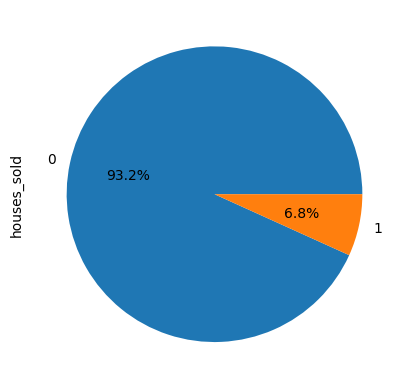

In [37]:
## pie chart of total houses sold
total_houses_sold.plot.pie(autopct='%1.1f%%')

In [38]:
## London most expensive boroughs
london_top10 = london_mprice.sort_values(ascending = False).to_frame()

print ('\nThe 10 most expensive boroughs in London are:')
london_top10.head(10)


The 10 most expensive boroughs in London are:


,average_price
area,
kensington and chelsea,"838,102.25"
westminster,"615,628.30"
camden,"527,806.98"
hammersmith and fulham,"499,380.32"
city of london,"480,923.93"
richmond upon thames,"429,248.18"
islington,"412,461.04"
wandsworth,"386,698.15"
barnet,"342,465.12"


Text(0.5, 1.0, 'Average price in the most expensive London boroughs (1995-2019)')

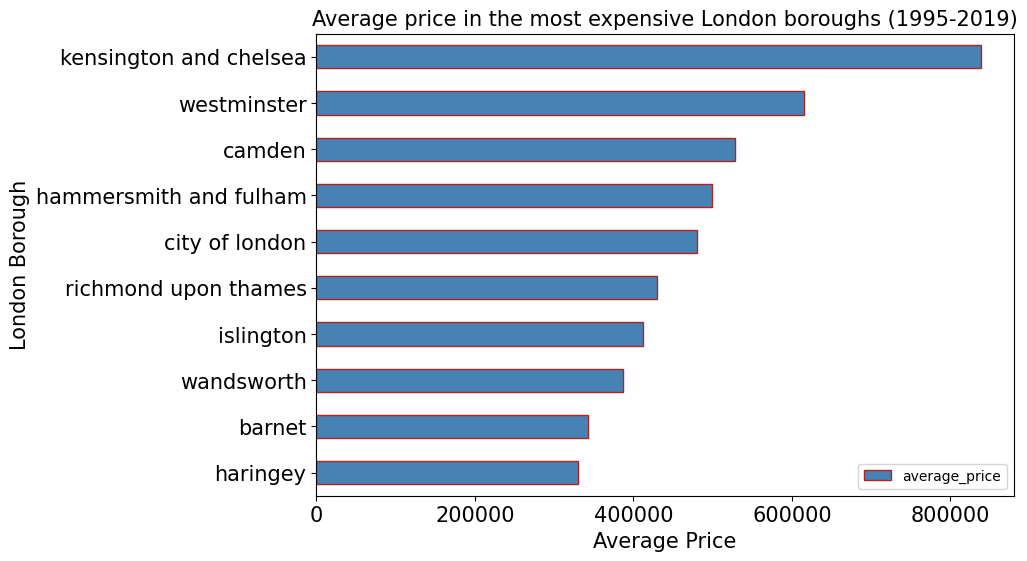

In [39]:
## BarChart of Londons top 10 expensive boroughs
london_top10.head(10).sort_values('average_price', ascending = True).plot(kind = 'barh', figsize = (9, 6), color = 'steelblue', edgecolor = 'firebrick')

plt.ylabel('London Borough', size = font_size)
plt.yticks(size = font_size)
plt.xlabel('Average Price', size = font_size)
plt.xticks([0, 200_000, 400_000, 600_000, 800_000], size = font_size)

plt.title('Average price in the most expensive London boroughs (1995-2019)', size = font_size, loc='center')

In [40]:
def plotHousingPrice(df):
    # Plot housing pricembehaviour from 1975 to 2021
    fig, ax = plt.subplots(figsize=(12, 8))

    colormap = plt.cm.gist_ncar
    ax.ticklabel_format(style='plain')
    sns.lineplot(data=df, x='year', y='average_price', hue='area')

    plt.title('Average Price by Area Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(london)))))
    plt.legend(title='Area', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
   

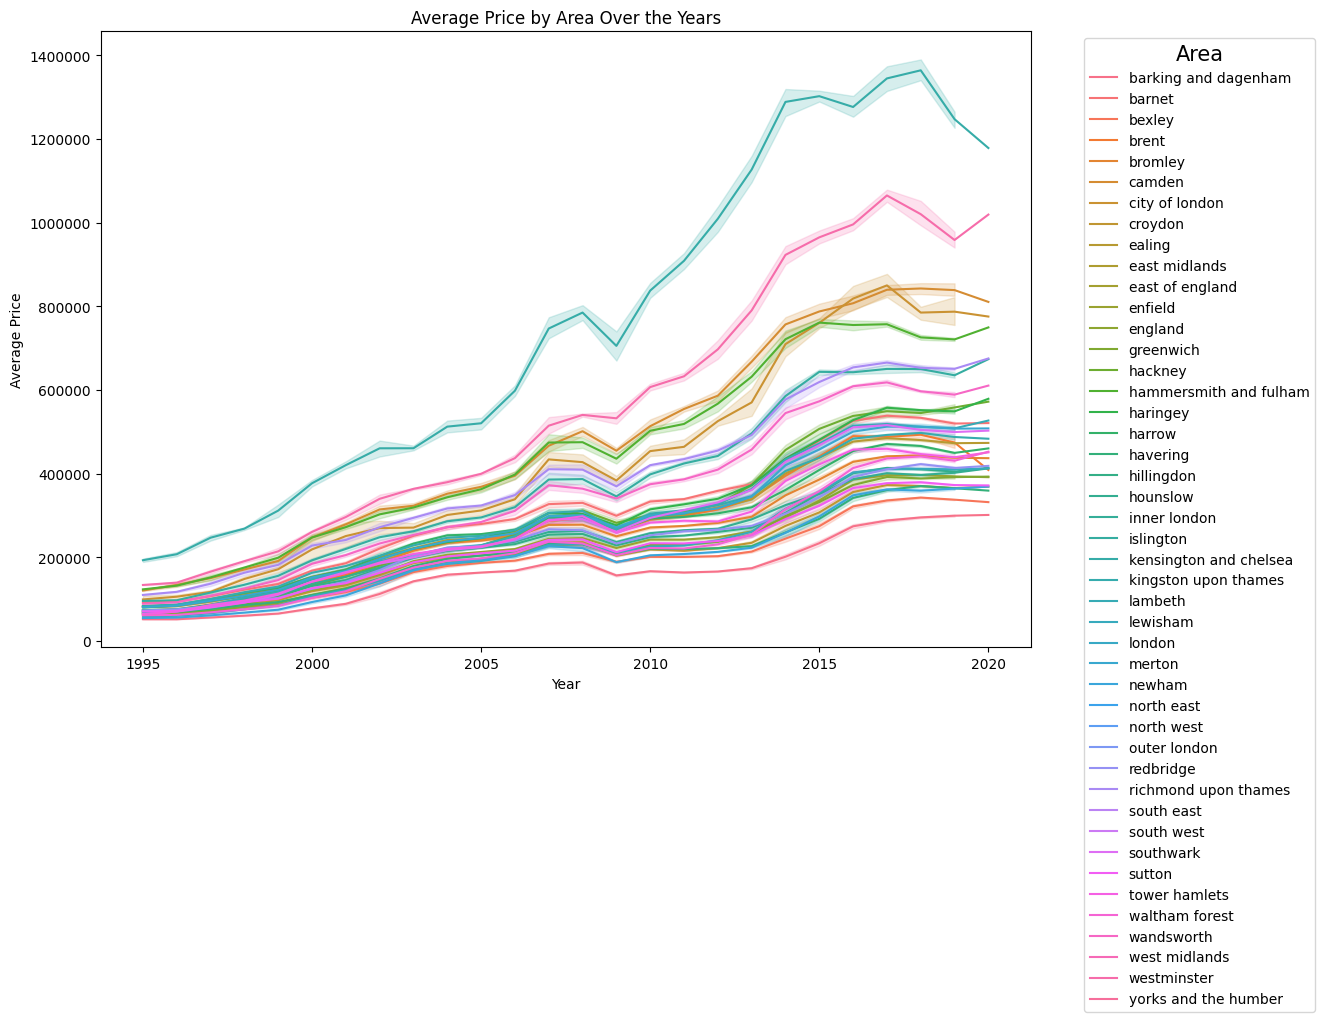

In [37]:
plotHousingPrice(london)

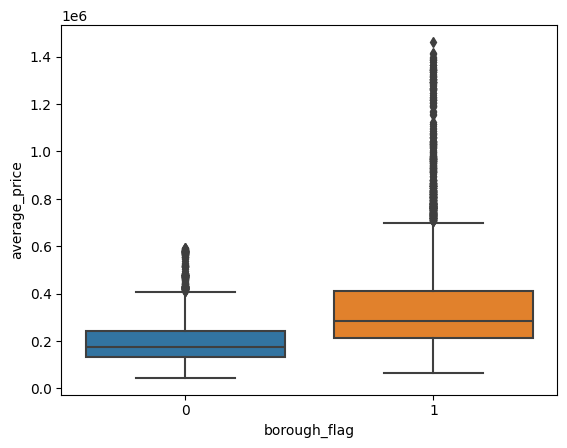

In [41]:
## box plot of average house prices for both 
plt.Figure(figsize=(8,10))
sns.boxplot(x='borough_flag', y='average_price', data=df)
plt.show()

In [42]:
londonP = london.groupby('area')['houses_sold'].sum()
lnd_top5 = londonP.sort_values(ascending = False).to_frame()
cvv = lnd_top5.head(5)
cvv

,houses_sold
area,
wandsworth,"139,150.82"
bromley,"127,622.82"
croydon,"123,268.82"
barnet,"113,432.82"
lambeth,"102,100.82"


In [43]:
london.value_counts().sum()

8316

In [44]:
london.head()

,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,mean_salary,median_salary,area_size,population_size
0,city of london,149143,9000001,41.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
1,city of london,164545,9000001,31.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
2,city of london,174586,9000001,53.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
3,city of london,191157,9000001,28.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
4,city of london,191081,9000001,35.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"


In [125]:
london['area'] = pd.factorize(london.area)[0]
london['area'] = london['area'].astype("float")
london

/var/folders/_x/g3c6ff9x60b48nssm8x5w2qw0000gn/T/ipykernel_75408/2951317668.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_x/g3c6ff9x60b48nssm8x5w2qw0000gn/T/ipykernel_75408/2951317668.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,mean_salary,median_salary,area_size,population_size
0,0.00,149143,9000001,41.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
1,0.00,164545,9000001,31.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
2,0.00,174586,9000001,53.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
3,0.00,191157,9000001,28.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
4,0.00,191081,9000001,35.00,"2,157.46",1,1999,"48,922.00","33,020.00","372,490.27","6,581.00"
...,...,...,...,...,...,...,...,...,...,...,...
8311,0.00,914870,9000033,156.00,"7,069.00",1,2019,"60,010.00","43,556.00","372,490.27","268,889.50"
8312,0.00,925955,9000033,169.00,"6,384.00",1,2019,"60,010.00","43,556.00","372,490.27","268,889.50"
8313,0.00,927864,9000033,168.00,"7,208.00",1,2019,"60,010.00","43,556.00","372,490.27","268,889.50"
8314,0.00,955615,9000033,150.00,"6,843.00",1,2019,"60,010.00","43,556.00","372,490.27","268,889.50"


In [88]:
## splitting the data into dependent and independent variable

x = london[['year', 'area', 'mean_salary', 'median_salary']]
y = london['average_price']

In [89]:
## split the data into train test and split
## 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [90]:
## Perform feature scaling with standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [92]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [93]:
y_pred = lin_reg.predict(x_test)

In [94]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

,Actual,Predicted
445,222919,"425,306.95"
8134,380433,"310,280.56"
1797,138691,"124,610.08"
2999,557025,"490,173.74"
4117,225183,"270,480.13"
...,...,...
813,168104,"158,762.16"
2880,308203,"326,190.75"
5257,491493,"476,391.43"
1266,121699,"66,154.31"


In [95]:
## model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 85016.03636871983
MSE: 17182027801.299534
RMSE: 131080.23421286495
R2: 0.5000503004258428


In [96]:
lin_reg.score(x_test, y_test)

0.5000503004258428

In [97]:
lin_reg.coef_

array([98680.41559234, 13225.74074074, 33197.89550015, 24228.25755274])

In [98]:
## Random Forest Model training
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [99]:
y_pred_rf = rf.predict(x_test)

In [100]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

,Actual,Predicted
445,222919,"238,436.16"
8134,380433,"379,539.69"
1797,138691,"132,718.86"
2999,557025,"547,997.32"
4117,225183,"232,340.30"
...,...,...
813,168104,"164,496.57"
2880,308203,"311,204.57"
5257,491493,"492,721.00"
1266,121699,"121,724.82"


In [101]:
## model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R2:', metrics.r2_score(y_test, y_pred_rf))

MAE: 10346.18959976207
MSE: 237263357.72906482
RMSE: 15403.355404880615
R2: 0.993096289577204


In [102]:
rf.score(x_test, y_test)

0.993096289577204

In [103]:
rf.oob_score_

0.9928045342245492

In [104]:
oob_error= 1 - rf.oob_score_
print(f'OOB Error: {oob_error: .3f}')

OOB Error:  0.007


In [105]:
## DECISION TREE Model
dtree = DecisionTreeRegressor()

In [106]:
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [107]:
y_pred_rg = dtree.predict(x_test)

In [108]:
## compare predicitions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rg})

,Actual,Predicted
445,222919,"238,970.71"
8134,380433,"379,483.50"
1797,138691,"132,405.50"
2999,557025,"548,276.45"
4117,225183,"232,443.00"
...,...,...
813,168104,"164,601.11"
2880,308203,"310,594.89"
5257,491493,"492,855.00"
1266,121699,"121,630.40"


In [109]:
## model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rg)))
print('R2:', metrics.r2_score(y_test, y_pred_rg))

MAE: 10345.47984476461
MSE: 237779889.626783
RMSE: 15420.113152204267
R2: 0.9930812599212129


In [110]:
dtree.score(x_test, y_test)

0.9930812599212129

In [111]:
## Save a chosen model based on statistical results
## save RANDOM FOREST MODEL

filename = 'rfmodel2.sav'
pickle.dump(rf, open(filename, 'wb'))

In [64]:
## To load rfmodel
##load_model = pickle.load(open(filename, 'rb'))

In [112]:
coden = london['area']
coden

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
8311   32.00
8312   32.00
8313   32.00
8314   32.00
8315   32.00
Name: area, Length: 8316, dtype: float64

In [120]:
cn = pd.DataFrame({'Borough': dmg['area'],'AreaCode': coden})

In [92]:
cn.insert(0, 'AREA', london['area'])
cn
##cn.value_counts()

,AREA,AreaEnc,CODE
0,city of london,6,9000001
1,city of london,6,9000001
2,city of london,6,9000001
3,city of london,6,9000001
4,city of london,6,9000001
...,...,...,...
9933,westminster,43,9000033
9934,westminster,43,9000033
9935,westminster,43,9000033
9936,westminster,43,9000033


In [93]:
cn.insert(3, 'Houses Sold', london['houses_sold'])
cn

,AREA,AreaEnc,CODE,Houses Sold
0,city of london,6,9000001,17.00
1,city of london,6,9000001,7.00
2,city of london,6,9000001,14.00
3,city of london,6,9000001,7.00
4,city of london,6,9000001,10.00
...,...,...,...,...
9933,westminster,43,9000033,169.00
9934,westminster,43,9000033,168.00
9935,westminster,43,9000033,150.00
9936,westminster,43,9000033,"3,893.99"


In [97]:
london['houses_sold'].value_counts()

houses_sold
3,893.99    69
233.00      44
303.00      41
274.00      41
248.00      41
            ..
596.00       1
770.00       1
603.00       1
761.00       1
690.00       1
Name: count, Length: 777, dtype: int64

In [70]:
london

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,areaEnc
0,1995-01-01,city of london,91449,9000001,17.00,"2,158.35",1,1995,6
1,1995-02-01,city of london,82203,9000001,7.00,"2,158.35",1,1995,6
2,1995-03-01,city of london,79121,9000001,14.00,"2,158.35",1,1995,6
3,1995-04-01,city of london,77101,9000001,7.00,"2,158.35",1,1995,6
4,1995-05-01,city of london,84409,9000001,10.00,"2,158.35",1,1995,6
...,...,...,...,...,...,...,...,...,...
9933,2019-09-01,westminster,925955,9000033,169.00,"6,384.00",1,2019,43
9934,2019-10-01,westminster,927864,9000033,168.00,"7,208.00",1,2019,43
9935,2019-11-01,westminster,955615,9000033,150.00,"6,843.00",1,2019,43
9936,2019-12-01,westminster,968404,9000033,"3,893.99","7,461.00",1,2019,43
